<a href="https://colab.research.google.com/github/alphthonio/My-MIT-/blob/Master/My_Foodhub_Project_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!jupyternbconvert--to html'FoodHubNotebook.ipynb'

/bin/bash: line 1: jupyternbconvert--to: command not found


In [1]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# import library to extract datetime features
import datetime as dt

# import library to suppress warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install nbconvert

In [ ]:
!jupyter nbconvert --to html '/content/drive/MyDrive/My_MIT_Work/FoodHubNotebook.ipynb'

[NbConvertApp] Converting notebook /content/drive/MyDrive/My_MIT_Work/FoodHubNotebook.ipynb to html
[NbConvertApp] Writing 1421908 bytes to /content/drive/MyDrive/My_MIT_Work/FoodHubNotebook.html


In [3]:
# load the data
df = pd.read_csv('/content/drive/MyDrive/My_MIT_Work/foodhub_order.csv')

# returns the first 5 rows
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


Observation

The DataFrame has 9 columns as mentioned in the Data Dictionary. Data in each row corresponds to the order placed by a customer.

In [4]:
df.shape

(1898, 9)

Observations:

*   The dataset has 1,898 rows and 9 columns.

In [5]:
# Checking the summary of the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


Observations:

*  All columns have 1,898 observations, which indicates that there are no null
   or missing values.
*  Day of the week has object data type instead of DateTime data type.

In [6]:
# Checking for missing values
df.isnull().sum()

,0
order_id,0
customer_id,0
restaurant_name,0
cuisine_type,0
cost_of_the_order,0
day_of_the_week,0
rating,0
food_preparation_time,0
delivery_time,0


Observations:

*   All the variables have no missing values.

In [7]:
# Checking the statistical summary for both numerical and non-numerical variables in the data.
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
order_id,1898.0,NaN,NaN,NaN,1477495.5,548.049724,1476547.0,1477021.25,1477495.5,1477969.75,1478444.0
customer_id,1898.0,NaN,NaN,NaN,171168.478398,113698.139743,1311.0,77787.75,128600.0,270525.0,405334.0
restaurant_name,1898,178,Shake Shack,219,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cuisine_type,1898,14,American,584,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cost_of_the_order,1898.0,NaN,NaN,NaN,16.498851,7.483812,4.47,12.08,14.14,22.2975,35.41
day_of_the_week,1898,2,Weekend,1351,NaN,NaN,NaN,NaN,NaN,NaN,NaN
rating,1898,4,Not given,736,NaN,NaN,NaN,NaN,NaN,NaN,NaN
food_preparation_time,1898.0,NaN,NaN,NaN,27.37197,4.632481,20.0,23.0,27.0,31.0,35.0
delivery_time,1898.0,NaN,NaN,NaN,24.161749,4.972637,15.0,20.0,25.0,28.0,33.0


In [8]:
# Checking the statistical summary for numerical variables in the data.
df.describe().T

,count,mean,std,min,25%,50%,75%,max
order_id,1898.0,1.477496e+06,548.049724,1476547.00,1477021.25,1477495.50,1.477970e+06,1478444.00
customer_id,1898.0,1.711685e+05,113698.139743,1311.00,77787.75,128600.00,2.705250e+05,405334.00
cost_of_the_order,1898.0,1.649885e+01,7.483812,4.47,12.08,14.14,2.229750e+01,35.41
food_preparation_time,1898.0,2.737197e+01,4.632481,20.00,23.00,27.00,3.100000e+01,35.00
delivery_time,1898.0,2.416175e+01,4.972637,15.00,20.00,25.00,2.800000e+01,33.00


Observations:

*   The difference between the third quartile and the highest value for the  
    food preparation time is small, indicating that there may be little or no outliers. The mean value is also approximately same with the 50th percentile.

In [9]:
# Checking the summary of the non-numerical variables
df.describe(exclude = 'number').T

,count,unique,top,freq
restaurant_name,1898,178,Shake Shack,219
cuisine_type,1898,14,American,584
day_of_the_week,1898,2,Weekend,1351
rating,1898,4,Not given,736


Observations:

*   The restaurant Shake Shack is the most used and has occurred 219 times
    in the dataset.
*   The variable day of the week has 2 unique categories and majority of the
    orders were placed during the weekend.

*   736 customers did not provide ratings.

In [10]:
# Making a list of all categorical variables
cat_col =['restaurant_name','cuisine_type', 'day_of_the_week', 'rating']

# Printing number of count of each unique value in each column
for column in cat_col:
    print(df[column].value_counts())

    print('-' * 40)


restaurant_name
Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
                            ... 
Sushi Choshi                   1
Dos Caminos Soho               1
La Follia                      1
Philippe Chow                  1
'wichcraft                     1
Name: count, Length: 178, dtype: int64
----------------------------------------
cuisine_type
American          584
Japanese          470
Italian           298
Chinese           215
Mexican            77
Indian             73
Middle Eastern     49
Mediterranean      46
Thai               19
French             18
Southern           17
Korean             13
Spanish            12
Vietnamese          7
Name: count, dtype: int64
----------------------------------------
day_of_the_week
Weekend    1351
Weekday     547
Name: count, dtype: int64
----------------------------------------
rating
Not given    736
5            5

Observations:

The above shows that each categorical variable has a unique count for each of the categories in them.

In [11]:
# Checking the total number of unique values in the variable restaurant_name
df['restaurant_name'].nunique()

178

In [12]:
# checking the unique categories and counts for the rating variable
df['rating'].value_counts()

,count
rating,
Not given,736
5,588
4,386
3,188


Observation:

*  736 orders were not rated, this is shown as 'Not given' above.

Exploratory Data Analysis(EDA)

Univariate Analysis (Questions 6 - 11)

In [13]:
# checking the unique values and their numbers in the different variables
df['order_id'].nunique()


1898

In [14]:
df['customer_id'].nunique()

1200

In [15]:
df['restaurant_name'].nunique()

178

In [16]:
df['cuisine_type'].nunique()

14

In [17]:
df['cost_of_the_order'].nunique()

312

In [18]:
df['day_of_the_week'].nunique()

2

In [19]:
df['rating'].nunique()

4

In [20]:
df['food_preparation_time'].nunique()

16

In [21]:
df['delivery_time'].nunique()

19

In [22]:
df['cuisine_type'].unique()

array(['Korean', 'Japanese', 'Mexican', 'American', 'Indian', 'Italian',
       'Mediterranean', 'Chinese', 'Middle Eastern', 'Thai', 'Southern',
       'French', 'Spanish', 'Vietnamese'], dtype=object)

In [23]:
df['rating'].unique()

array(['Not given', '5', '3', '4'], dtype=object)

In [24]:
df['day_of_the_week'].unique()

array(['Weekend', 'Weekday'], dtype=object)

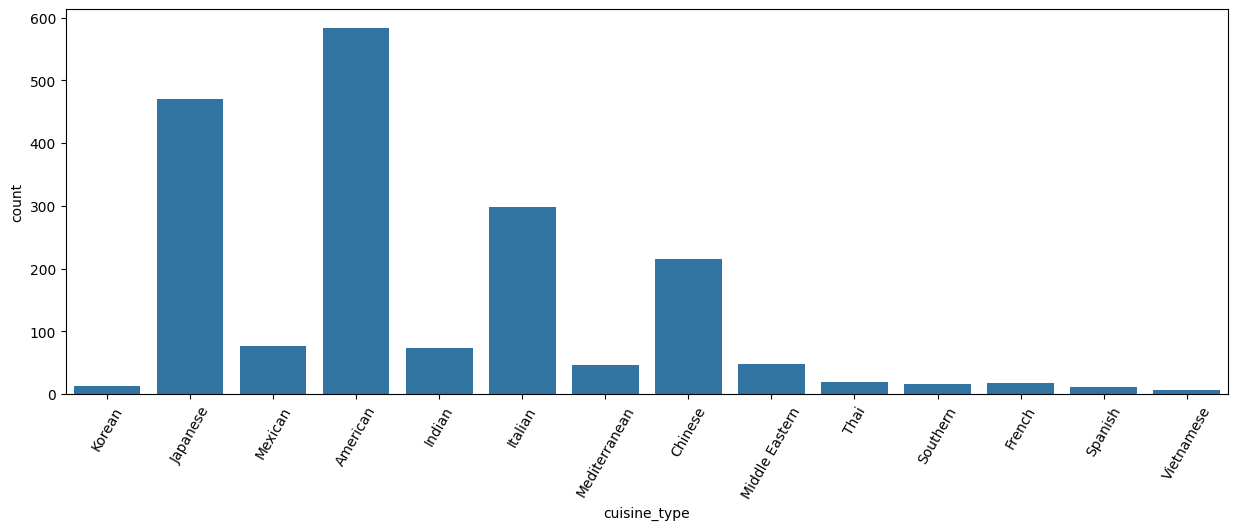

In [25]:
plt.figure(figsize = (15,5))
sns.countplot(data = df, x = 'cuisine_type')
plt.xticks(rotation=60)
plt.show()

Observation:

*   American cuisine is the most ordered and has the highest count of 584. This
    is followed by Japanese and Italian with 470 and 298 counts respectively.

*   Mexican has 11 times the count of Vietnamese, which is the least ordered by
    the customers.

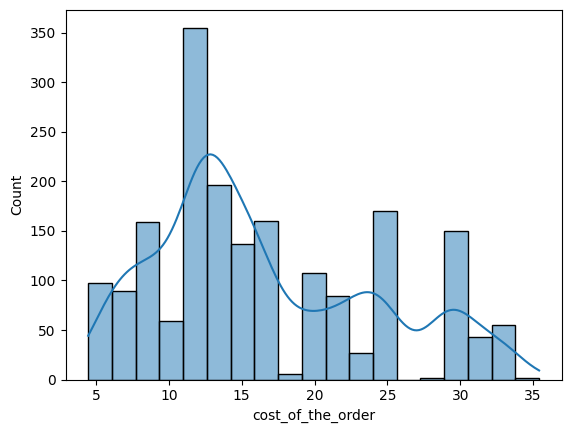

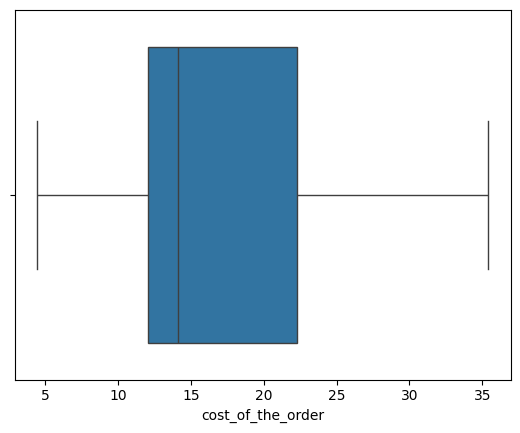

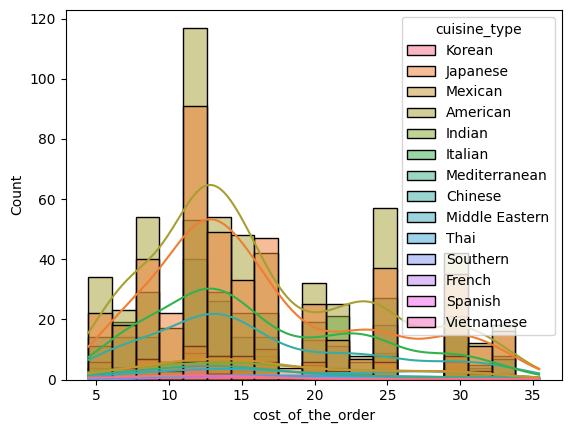

In [26]:
sns.histplot(data = df,x='cost_of_the_order', kde =True)
plt.show()
sns.boxplot(data=df,x='cost_of_the_order')
plt.show()
sns.histplot(data = df,x='cost_of_the_order', hue ='cuisine_type', kde =True)
plt.show()

Observations:

*   The maximum cost is $35.41 and the difference between this and the third
    quartile value shows that the distribution is skewed to the right and there are no outliers.

*   The median as shown in the boxplot is closer to the 25th percentile, confirming that there are more occurences on the righ; thus the  distribution is skewewd-right.

*   The cost of order also followed the same distribution pattern for all the cuisine types.

<Axes: xlabel='day_of_the_week', ylabel='count'>

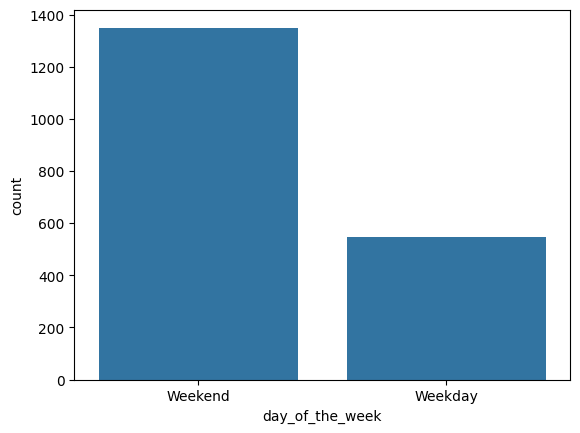

In [27]:
sns.countplot(data = df, x = 'day_of_the_week')

Observation:

*   The above shows that most of the orders are done during the weekends and
    about 40% of the weekend orders are witnessed during the week days.

<Axes: xlabel='rating', ylabel='count'>

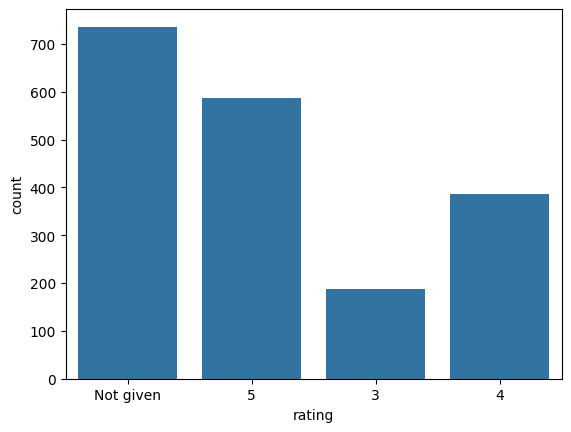

In [28]:
sns.countplot(data=df, x ='rating')

Observation:

*  Most of the orders were not rated.
*  About 31% were rated as 5.
*  The least rating was 3 and only about 10% of the orders are in this group.

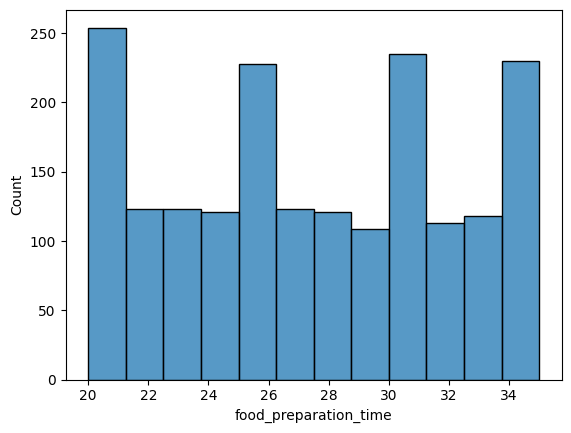

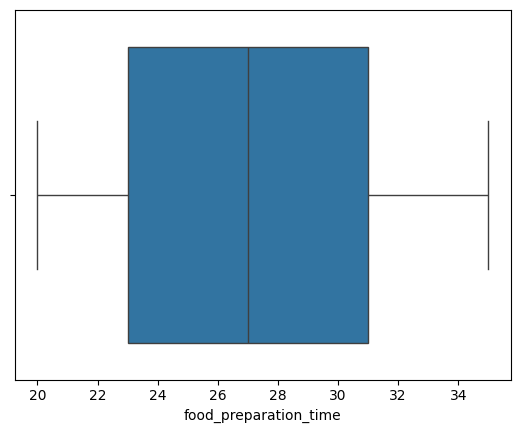

In [29]:
sns.histplot(data=df,x='food_preparation_time',kde=False)
plt.show()
sns.boxplot(data=df,x='food_preparation_time')
plt.show()

Observation:

*  The boxplot showed a normal distribution with the distance between the median and the first quartile value same as that between the median and the third quartile value. The variable food preparation time showed no outfliers.

* However, the histogram for the same variable showed the presence of multimodality and clusters. We have varrious sections of our with the most prevalent values having a dip in between them.

* The variable foof preparation time has the most frequent values around 21, 26, 33 and 35 minutes.

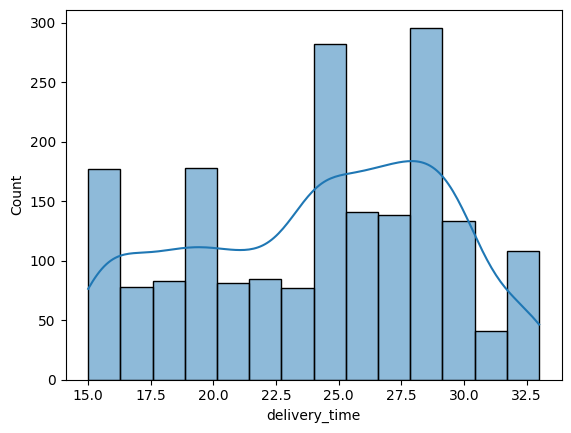

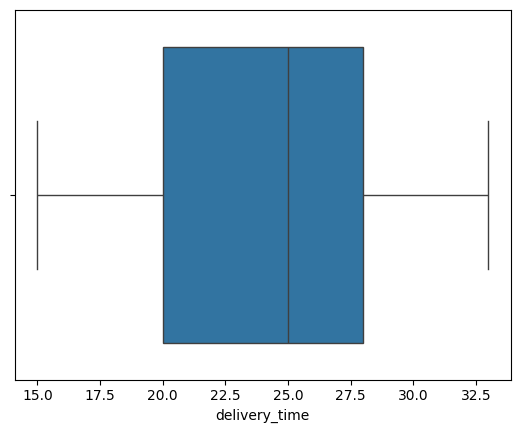

In [30]:
sns.histplot(data=df,x='delivery_time', kde = True)
plt.show()
sns.boxplot(data=df,x='delivery_time')
plt.show()

Observation:

The outputs above showed a slightly negatively skewed distribution. In the boxplot, the median is closer to the 75th percentile. Also, the histogram showed more occurences on the left hand side than on the right.

In [31]:
# checking the counts of the top restaurants
df['restaurant_name'].value_counts()

,count
restaurant_name,
Shake Shack,219
The Meatball Shop,132
Blue Ribbon Sushi,119
Blue Ribbon Fried Chicken,96
Parm,68
...,...
Sushi Choshi,1
Dos Caminos Soho,1
La Follia,1


Observations:

The top 5 restaurants in terms of the number of orders recieved are: Shake Shack, The Meatball Shop, Blue Ribbon Sushi, Blue Ribbon Fried Chicken and Parm restaurants.

In [32]:
# Get the most popular cuisine on weekends
df_weekend = df[df['day_of_the_week'] == 'Weekend']
df_weekend['cuisine_type'].unique()

unique_cuisines = df_weekend['cuisine_type'].unique()
cuisine_counts = {}
for cuisine in unique_cuisines:
    count = len(df_weekend[df_weekend['cuisine_type'] == cuisine])
    cuisine_counts[cuisine] = count
    The_most_popular_cuisine = max(cuisine_counts, key=cuisine_counts.get)

print('The most popular cuisine on weekends is', The_most_popular_cuisine)

The most popular cuisine on weekends is American


In [33]:
# Get the most popular cuisine on weekdays
df_weekday = df[df['day_of_the_week'] == 'Weekday']
df_weekday['cuisine_type'].unique()

unique_weekday_cuisines = df_weekday['cuisine_type'].unique()
cuisine_counts = {}
for cuisine in unique_cuisines:
    count = len(df_weekday[df_weekday['cuisine_type'] == cuisine])
    cuisine_counts[cuisine] = count
    The_most_popular_weekday_cuisine = max(cuisine_counts, key=cuisine_counts.get)

print('The most popular cuisine on weekdays is', The_most_popular_weekday_cuisine)

The most popular cuisine on weekdays is American


Observation

American cuisine is the most popular both on weekends and weekdays.

In [34]:
# Get orders that cost above 20 dollars
df_greater_than_20 = df[df['cost_of_the_order']>20]

print('The number of total orders that cost above 20 dollars is:', df_greater_than_20.shape[0])

The number of total orders that cost above 20 dollars is: 555


In [35]:
# Calculate percentage of such orders in the dataset
percentage = (df_greater_than_20.shape[0] / df.shape[0]) * 100

print("Percentage of orders above 20 dollars:",  round(percentage, 2), '%', )

Percentage of orders above 20 dollars: 29.24 %


In [36]:
# filtering the details of the rows affected
df.loc[df['cost_of_the_order']> 20]. value_counts()

,,,,,,,,,count
order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time,
1476560,149508,Shake Shack,American,22.26,Weekend,4,32,17,1
1477852,74412,da Umberto,Italian,32.98,Weekend,Not given,30,28,1
1477846,52574,Blue Ribbon Sushi,Japanese,24.25,Weekday,5,30,26,1
1477847,106478,Blue Ribbon Sushi,Japanese,24.25,Weekday,4,22,29,1
1477848,276192,12 Chairs,Middle Eastern,29.05,Weekday,5,28,32,1
...,...,...,...,...,...,...,...,...,...
1477181,302790,Carmine's,Italian,29.05,Weekday,Not given,33,32,1
1477180,154339,Chipotle Mexican Grill $1.99 Delivery,Mexican,29.15,Weekday,Not given,21,24,1
1477179,52832,L'Express,French,24.20,Weekday,Not given,28,24,1


In [37]:
# Get the mean delivery time
mean_del_time = df['delivery_time'].mean()

print('The mean delivery time for this dataset is', round(mean_del_time, 2), 'minutes')

The mean delivery time for this dataset is 24.16 minutes


In [38]:
# Get the counts of each customer_id
df['customer_id'].value_counts()


,count
customer_id,
52832,13
47440,10
83287,9
250494,8
259341,7
...,...
385426,1
254913,1
289597,1


In [39]:
# Get the count of the first 3
df['customer_id'].value_counts().head(3)

,count
customer_id,
52832,13
47440,10
83287,9


Observations:

The output above displayed the IDs of the top 3 most frequent customers and the number of orders each placed. All together, they placed a total of 32 orders.

**Multivariate Analysis** (Questions 12 - 16)

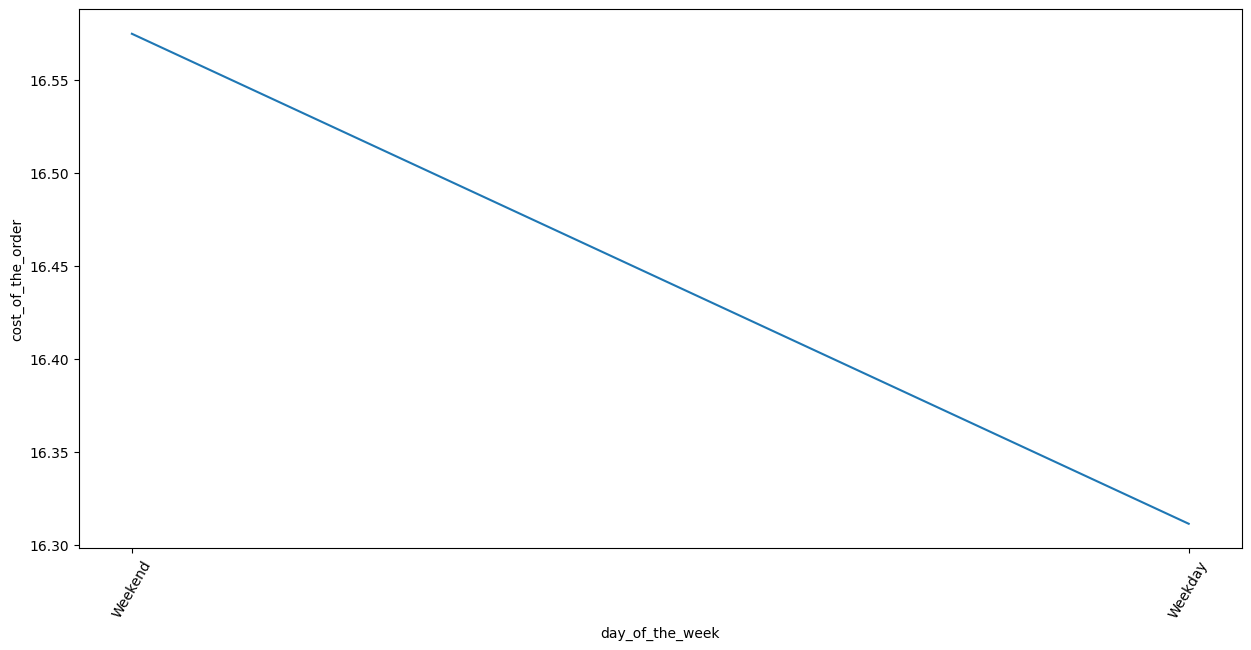

In [40]:
# Relationship between cost of the order and day of the week
plt.figure(figsize=(15,7))
sns.lineplot(data = df, x = "day_of_the_week", y = "cost_of_the_order", ci = None)
plt.xticks(rotation = 60)
plt.show()

Observation:

*  The cost of the orders are more during weekends and decreases as we move away from the weekends.

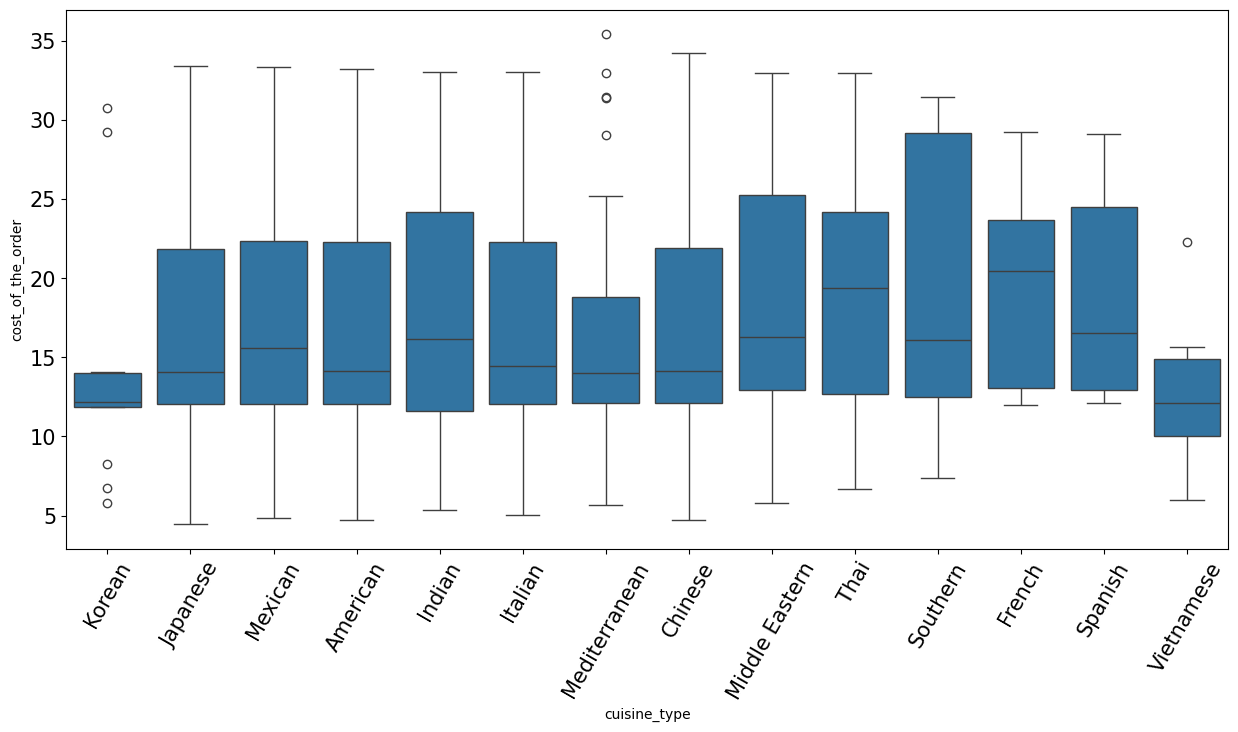

In [41]:
# Relationship between cost of the order and cuisine type
plt.figure(figsize=(15,7))
sns.boxplot(data = df, x = 'cuisine_type', y = 'cost_of_the_order')
plt.xticks(rotation = 60)
plt.yticks(fontsize =15)
plt.xticks(fontsize =15)
plt.show()

Observations:

*   Most of the cuisines have similar maximum and minimum costs.
*   Korean, Mediterranean and Vetnamese cuisines showed outfliers with the Korean cuisine showing outfliers on both sides.

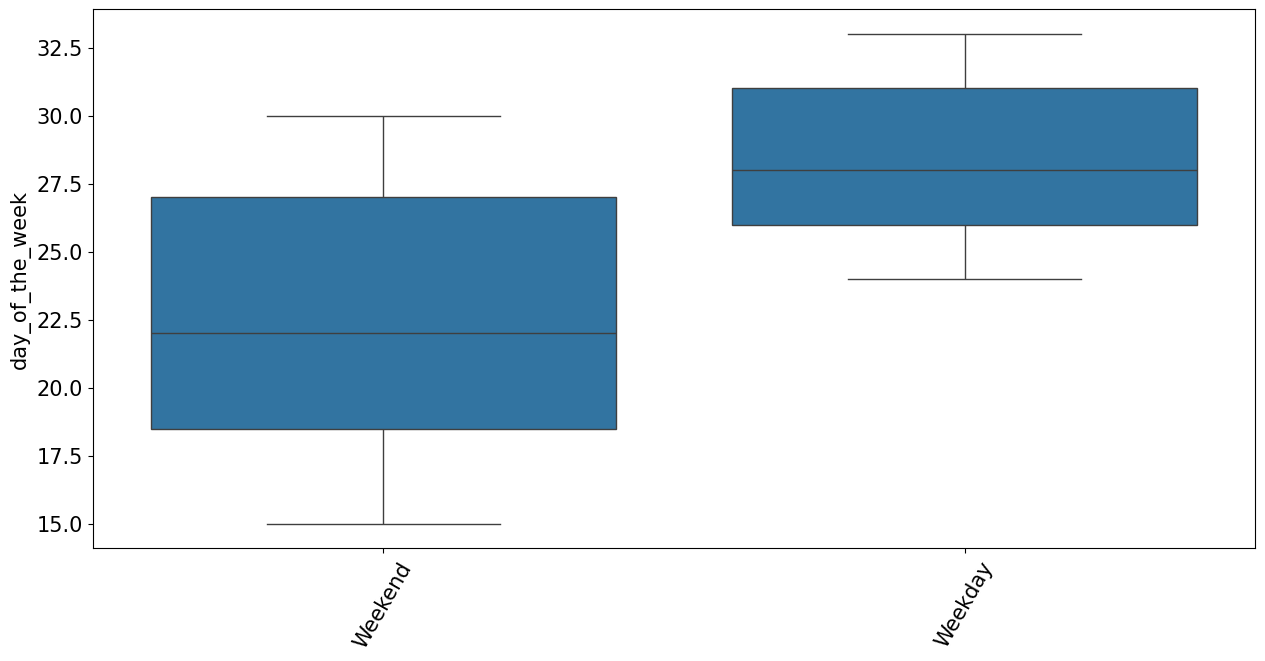

In [42]:
# Relationship between day of the week and delivery time
plt.figure(figsize=(15,7))
sns.boxplot(data = df, y = 'delivery_time', x = 'day_of_the_week')
plt.xticks(rotation = 60)
plt.yticks(fontsize =15)
plt.xticks(fontsize =15)
plt.xlabel('')
plt.ylabel('day_of_the_week', fontsize=15)
plt.show()

Observations:

* The orders are higher during weekends than weekdays. And the delivery time was lower during the weekends as well.

In [43]:
# Visualizing the relationship between cost of the order and the restaurant
df.groupby(['restaurant_name'])['cost_of_the_order'].sum().sort_values(ascending = False).head(14)

,cost_of_the_order
restaurant_name,
Shake Shack,3579.53
The Meatball Shop,2145.21
Blue Ribbon Sushi,1903.95
Blue Ribbon Fried Chicken,1662.29
Parm,1112.76
RedFarm Broadway,965.13
RedFarm Hudson,921.21
TAO,834.50
Han Dynasty,755.29


Observations:

*  The top 14 restaurants with the highest order counts were also observed with
   the highest total cost of the orders.

*  Shake Shack which was confirmed earlier by the statistical summary of the
   dataset has a total of $3,579.53 orders placed.

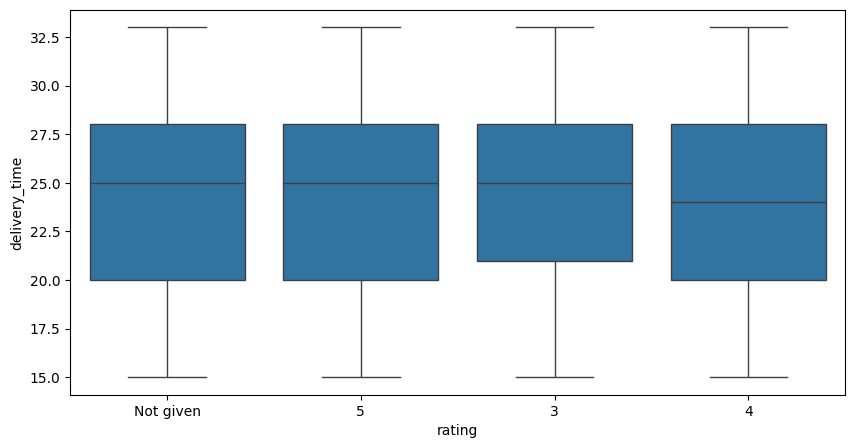

In [44]:
# Relationship between rating and delivery time
plt.figure(figsize=(10, 5))
sns.boxplot(data = df, x = 'rating', y = 'delivery_time')
plt.show()

Observations:

The delivery time is uniform across all ratings except for the group 4 which is slightly different

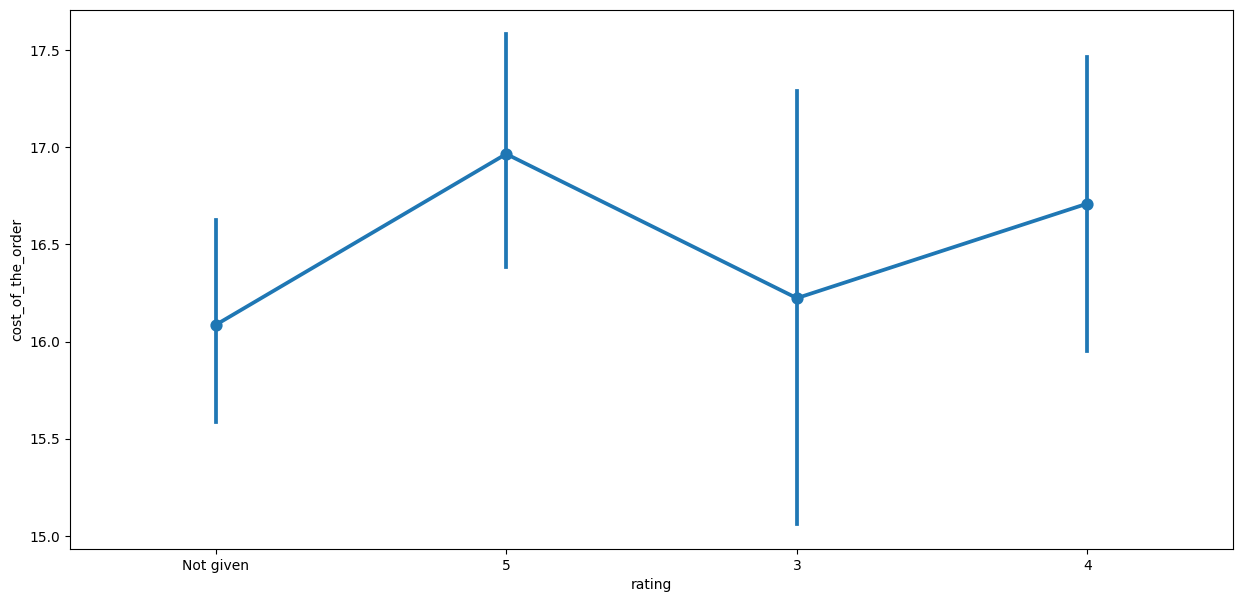

In [45]:
# Relationship between rating and cost of the order
plt.figure(figsize=(15, 7))
sns.pointplot(data = df, x = 'rating', y = 'cost_of_the_order')
plt.show()

Observation:

The higher the cost of the order, the higher the rating, this indicates a positive feeback.

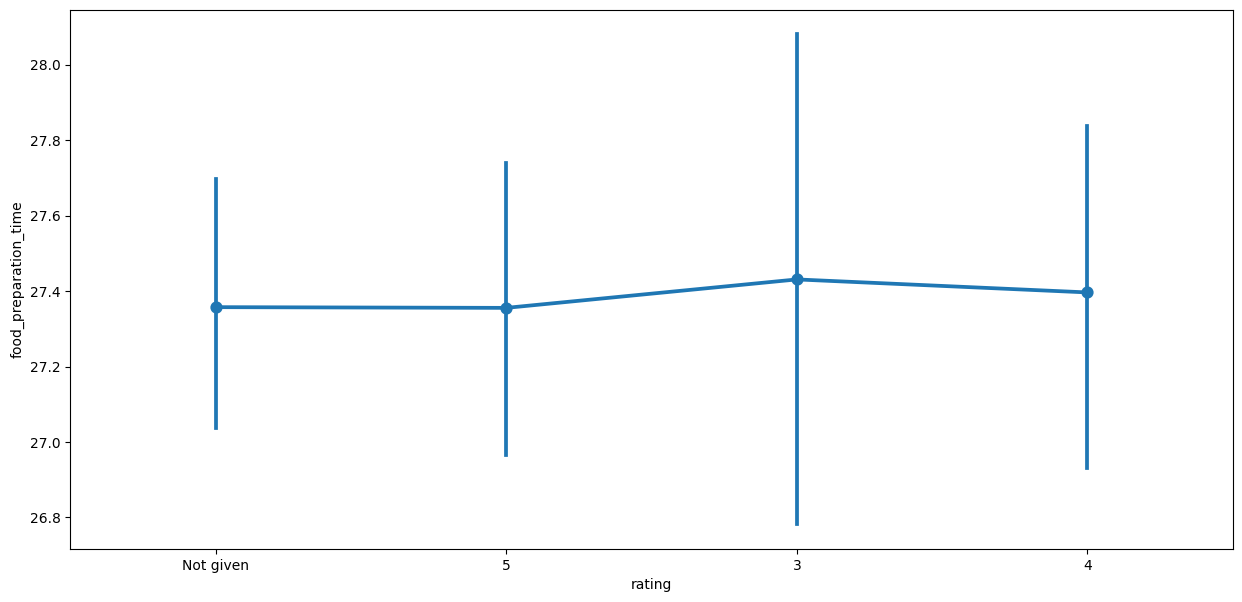

In [46]:
# Relationship between rating and food preparation time
plt.figure(figsize=(15, 7))
sns.pointplot(data = df, x = 'rating', y = 'food_preparation_time')
plt.show()

Observation:

There is a clear relationship between rating and the food preparation time. The order that took more time to be prepared was rated more poorly.

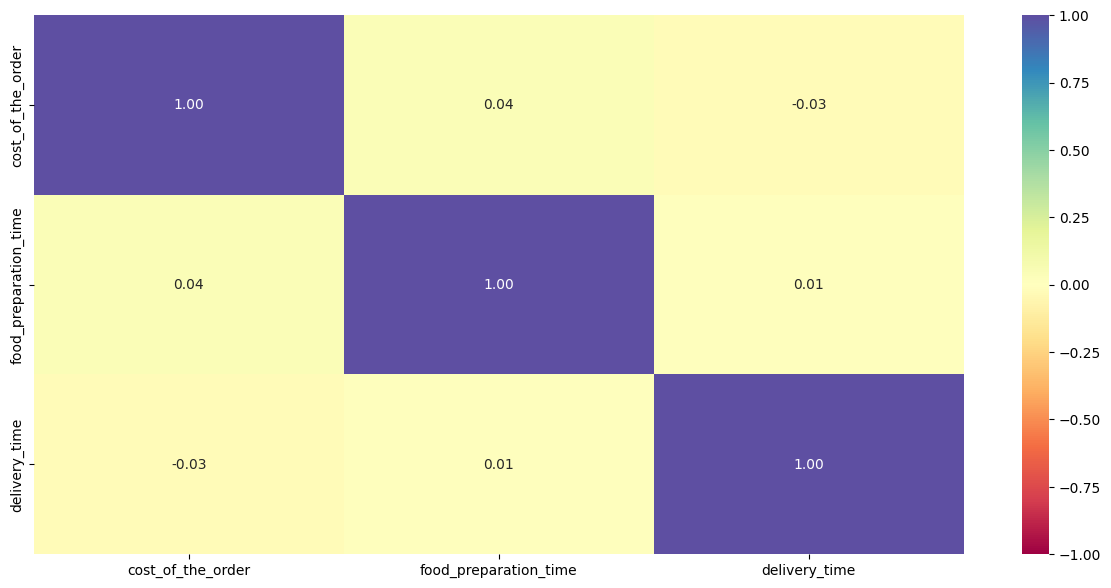

In [47]:
# Visualizing the relationship between the continuous variables
column_list = ['cost_of_the_order', 'food_preparation_time', 'delivery_time']
plt.figure(figsize=(15, 7))
sns.heatmap(df[column_list].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

Observation

Cost of order showed a negative correlation with the delivery time and a slightly positive correlation with the food preparation time.

In [49]:
# Calculate the correlation matrix only for numeric columns
numerical_df = df.select_dtypes(include=['number'])  # Select only columns with numeric data types
corr = numerical_df.corr()  # Calculate the correlation matrix for numeric columns


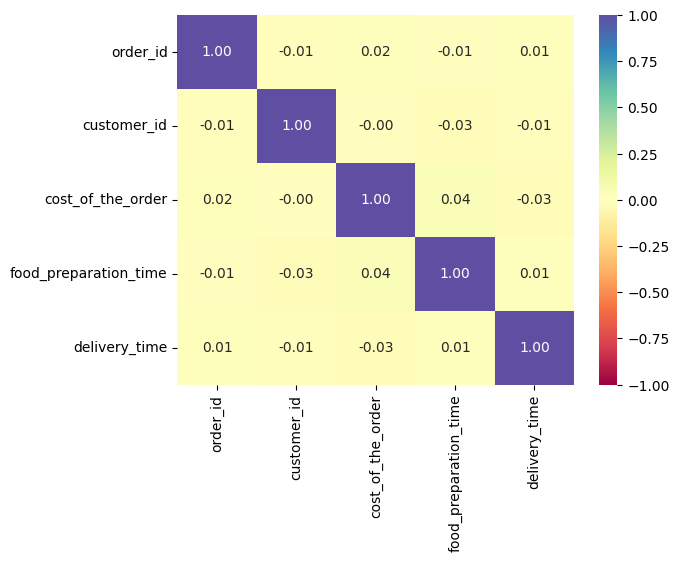

In [51]:
corr = numerical_df.corr()
sns.heatmap(corr, annot=True,vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

Observation

Same correlation between the continous variables was observed.

In [52]:
# Filter the rated restaurants
df_rated = df[df['rating'] != 'Not given'].copy()

# Convert rating column from object to integer
df_rated['rating'] = df_rated['rating'].astype('int')

# Create a dataframe that contains the restaurant names with their rating counts
df_rating_count = df_rated.groupby(['restaurant_name'])['rating'].count().sort_values(ascending = False).reset_index()
df_rating_count.head(10)

,restaurant_name,rating
0,Shake Shack,133
1,The Meatball Shop,84
2,Blue Ribbon Sushi,73
3,Blue Ribbon Fried Chicken,64
4,RedFarm Broadway,41
5,Parm,39
6,RedFarm Hudson,34
7,TAO,28
8,Rubirosa,24
9,Nobu Next Door,23


In [53]:
# Filter restaurants with rating count more than 50
df_rating_count_more_than_50 = df_rating_count[df_rating_count['rating'] > 50]

# Extract the restaurant names
restaurant_names_more_than_50 = df_rating_count_more_than_50['restaurant_name'].tolist()
print("Restaurants with rating count more than 50:", restaurant_names_more_than_50)

Restaurants with rating count more than 50: ['Shake Shack', 'The Meatball Shop', 'Blue Ribbon Sushi', 'Blue Ribbon Fried Chicken']


In [54]:
df_rating_count_more_than_50.groupby(['restaurant_name'])['rating'].mean().sort_values(ascending=False).reset_index().dropna()

,restaurant_name,rating
0,Shake Shack,133.0
1,The Meatball Shop,84.0
2,Blue Ribbon Sushi,73.0
3,Blue Ribbon Fried Chicken,64.0


In [55]:
# to get he restaurants with an average mean rating greater than 4
average_ratings = df_rating_count_more_than_50.groupby(['restaurant_name'])['rating'].mean()
highly_rated_restaurants = average_ratings[average_ratings > 4]
print('The restaurants with average mean rating greater than 4 and rating count more than 50 are:', highly_rated_restaurants)

The restaurants with average mean rating greater than 4 and rating count more than 50 are: restaurant_name
Blue Ribbon Fried Chicken     64.0
Blue Ribbon Sushi             73.0
Shake Shack                  133.0
The Meatball Shop             84.0
Name: rating, dtype: float64


In [56]:
#function to determine the revenue of the company
def compute_rev(x):
    if x > 20:
        return x*0.25
    elif x > 5:
        return x*0.15
    else:
        return x*0
df['Revenue'] = df['cost_of_the_order'].apply(compute_rev)

In [57]:
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time,Revenue
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20,7.6875
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23,1.8120
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28,1.8345
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15,7.3000
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24,1.7385


In [58]:
# get the total revenue and print it
total_rev = df['Revenue'].sum()
print('The net revenue is around ','$', round(total_rev, 2),sep='')

The net revenue is around $6166.3


In [59]:
# Calculate the total delivery time and add the new column to the dataframe df to store the total delivery time
df['total_delivery_time'] = df['food_preparation_time'] + df['delivery_time']
df.head(3)

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time,Revenue,total_delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20,7.6875,45
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23,1.8120,48
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28,1.8345,51


In [60]:
# find the percentage of orders that have more than 60 minutes of total delivery time
df_greater_than_60 = df[df['total_delivery_time']>60]

percentage = (df_greater_than_60.shape[0] / df.shape[0]) * 100

print("The percentage of orders above 60 minutes total delivery time: ", round(percentage, 2), '%',sep='')


The percentage of orders above 60 minutes total delivery time: 10.54%


In [61]:
# Get the mean delivery time on weekdays and print it
print('The mean delivery time on weekdays is around',
      round(df[df['day_of_the_week'] == 'Weekday']['delivery_time'].mean()),
     'minutes')

The mean delivery time on weekdays is around 28 minutes


In [62]:
print('The mean delivery time on weekends is around',
      round(df[df['day_of_the_week'] == 'Weekend']['delivery_time'].mean()),
     'minutes')

The mean delivery time on weekends is around 22 minutes


CONCLUSION

A dataset consisting of more than 1800 orders was generated from the online portal of FoodHub and analysed. The various restaurants' cost of order,type of cuisine, delivery time, day of the week,food preparation time and the ratings (feedback) they recieved from the customers were also investigated and the following conclusions were drawn from the exploratory data analysis:


*   Customers placed more orders during the weekends than the weekdays.
*   American cuisine is the most popular as it has the highest order count
    both during the week and the weekends.
*   Orders that took more food preparation time were rated poorly.
*   Delivery time appeared to be uniform among the various restaurants.However,
    only about 10% of the orders took more than 1hr total delivery time.
*   Average delivery time during the weekends was less than the average during
    the weekdays, even when a greater percentage of the orders were placed during weekends.
*   The higher the delivery time, the lower the cost of order. Both showed a
    negative correlation with each other.
*   Rating was not affected by the high cost of order, as even the cuisine  
    types with higher cost were rated well by the customers.











RECOMMENDATION

1. Restaurants are to optimize their food preparation processes, either by engaging more labor force or using mechanised cooking techniques to quicken their activities and ensure timely deliveries; especially during the weekdays.

2. The high number of orders achieved during the weekends should be sustained while the average delivery time for the weekdays should be reduced. Restaurants to engage more hands in order to reduce the food preparation time.

3. Customers are more likely to order from highly rated top restaurants, as evidenced in the rating pattern we analysed. Hence, top performing restaurants should be given more discounts and charged less by the company, as a way of motivating the laggards to improve and diversify their menu options in line with customers' demands.


